# Daten von MongoDB direkt laden
Zum Laden der Daten von der MongoDB muss man im HS-VPN sein!
intro in MongoDB-Queries: [click me](https://docs.mongodb.com/manual/tutorial/query-documents/)

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pymongo import MongoClient
import mongodb_connection
from datetime import datetime, timedelta
import copy

In [3]:
client = MongoClient(mongodb_connection.connectionstring)
db = client.DMG_CELOS_MOBILE_V3_CA
collection = db["values"]
# for a first, get documents between 26.11.2019, 9:30 and 26.11.2019, 23:59
# only get documents with ValueID = 12430012063.X1_Axis.Actual_Position_MCS
vID = "12430012063.X1_Axis.Actual_Position_MCS"
tsStart = datetime(2019,11,26,12,15)
tsEnd = datetime(2019,11,26,13,10) # durch versuche herausgefunden (plotten der X-Position)
cursor = collection.find({
    'timeStamp' : {'$gt':tsStart, '$lt':tsEnd} # $gt: greater than, $lt: less than
})
df = pd.DataFrame(columns=['_id','ValueID','value','timeStamp'])
i = 0
for item in cursor:
    df.loc[i] = [item['_id'],item['ValueID'],item['value_number'],item['timeStamp']]
    i+=1
print(df.shape)

KeyboardInterrupt: 

In [36]:
#only uncomment for export
#df.to_csv("2019-11-26_export.csv", index=False)

In [61]:
df = pd.read_csv("2019-11-26_export.csv", encoding="utf-8")
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
print(df.dtypes)
print(df.shape)
print(df.iloc[131167])

_id                  object
ValueID              object
value               float64
timeStamp    datetime64[ns]
dtype: object
(131168, 4)
_id                                   5ddd25148e15b3086c07bed5
ValueID      12430012063.Tool_Control_Center.Axial_Force_Co...
value                                                        0
timeStamp                           2019-11-26 13:15:16.601000
Name: 131167, dtype: object


In [62]:
df["ValueID"].value_counts()

12430012063.Main_Spindle.Actual_Position_MCS                    14288
12430012063.Energy_Savings.Active_Power_Spindle1                12396
12430012063.Z1_Axis.Actual_Position_MCS                         11145
12430012063.Tool_Control_Center.Symmetry                         8173
12430012063.Z1_Axis.Actual_Power                                 8024
12430012063.Main_Spindle.Actual_Power                            7700
12430012063.Energy_Savings.Active_Power_Z1                       5724
12430012063.Y1_Axis.Actual_Power                                 5167
12430012063.X1_Axis.Actual_Power                                 4690
12430012063.Tool_Control_Center.Axial_Force_Tension              4643
12430012063.Z1_Axis.Actual_Feed_Rate                             4465
12430012063.X1_Axis.Actual_Position_MCS                          4453
12430012063.Main_Spindle.Actual_Speed_Rate                       4409
12430012063.Y1_Axis.Actual_Position_MCS                          3861
12430012063.X1_Axis.

In [63]:
def plotSpecificIDs(idList):
    tsStart = datetime(2019,11,26,12,0)
    tsEnd = datetime(2019,11,26,23,35)
    plt.figure(figsize=(15, 5), dpi=80)
    plt.plot(df.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp'])& (l['timeStamp'] < tsEnd), "timeStamp"],df.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp']) & (l['timeStamp'] < tsEnd), 'value'], c='r')
    for id in idList:
        plt.scatter(df.loc[lambda l: (l['ValueID']==id) & (tsStart < l['timeStamp'])& (l['timeStamp'] < tsEnd), "timeStamp"],df.loc[lambda l: (l['ValueID']==id) & (tsStart < l['timeStamp'])& (l['timeStamp'] < tsEnd), "value"], s=1)
    plt.legend(["12430012063.Z1_Axis.Actual_Position_MCS"]+idList)
    plt.show()

<Figure size 1200x400 with 0 Axes>

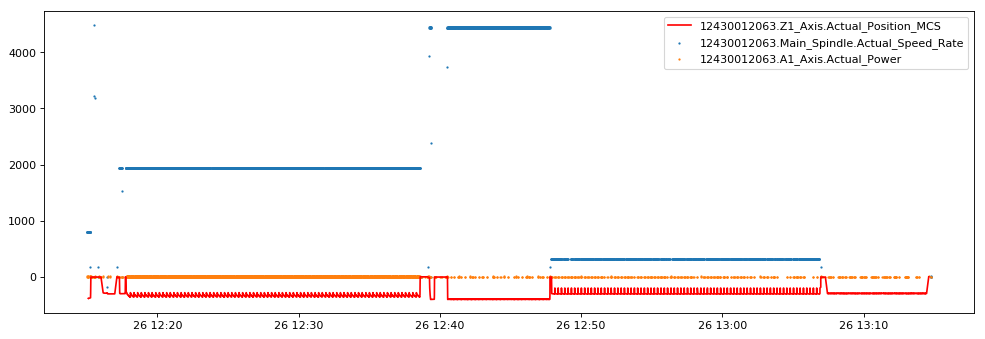

In [64]:
tsStart = datetime(2019,11,26,12,0)
tsEnd = datetime(2019,11,26,23,35)
plt.figure(figsize=(15, 5), dpi=80)

toPlot = ["12430012063.Main_Spindle.Actual_Speed_Rate","12430012063.A1_Axis.Actual_Power"]

plotSpecificIDs(toPlot)

In [65]:
df.loc[lambda l: l['ValueID']=="12430012063.Maintenance_Package.Tool_Changer_Main"]

,_id,ValueID,value,timeStamp
575,5ddd17038e15b3086c052b2c,12430012063.Maintenance_Package.Tool_Changer_Main,4997804.0,2019-11-26 12:15:16.454
777,5ddd170f8e15b3086c052c16,12430012063.Maintenance_Package.Tool_Changer_Main,4997803.0,2019-11-26 12:15:27.886
1095,5ddd17258e15b3086c052d7b,12430012063.Maintenance_Package.Tool_Changer_Main,4997802.0,2019-11-26 12:15:50.136
2249,5ddd17758e15b3086c05326e,12430012063.Maintenance_Package.Tool_Changer_Main,4997801.0,2019-11-26 12:17:10.026
2250,5ddd1a3b8e15b3086c05c3f6,12430012063.Maintenance_Package.Tool_Changer_Main,4997801.0,2019-11-26 12:17:10.026
2251,5ddd1c938e15b3086c063b72,12430012063.Maintenance_Package.Tool_Changer_Main,4997801.0,2019-11-26 12:17:10.026
54849,5ddd1c9c8e15b3086c063bcf,12430012063.Maintenance_Package.Tool_Changer_Main,4997800.0,2019-11-26 12:39:09.262
55439,5ddd1cb88e15b3086c063ea0,12430012063.Maintenance_Package.Tool_Changer_Main,4997799.0,2019-11-26 12:39:37.075
55622,5ddd1cc58e15b3086c063f6b,12430012063.Maintenance_Package.Tool_Changer_Main,4997798.0,2019-11-26 12:39:49.774
81271,5ddd1ea28e15b3086c06b044,12430012063.Maintenance_Package.Tool_Changer_Main,4997797.0,2019-11-26 12:47:47.338


(52591, 4)


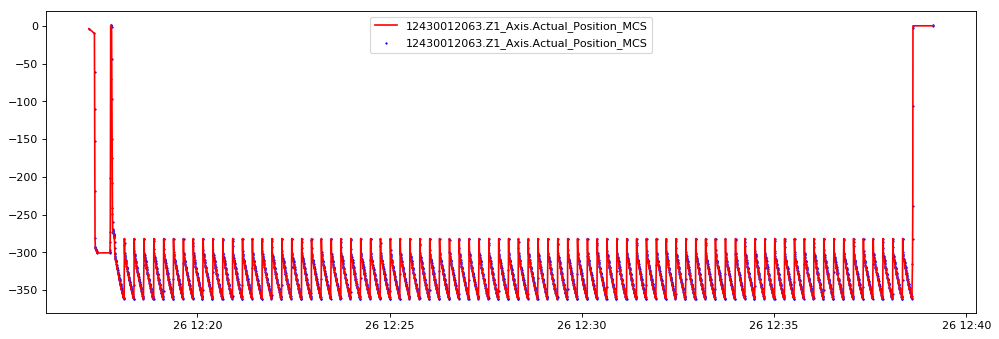

In [83]:
dtStartEbene1 = datetime(2019,11,26,12,17,10)
dtEndEbene1 = datetime(2019,11,26,12,39,9)
dfAllEbene1 = df.loc[lambda l: (dtStartEbene1 < l["timeStamp"]) & (l["timeStamp"] < dtEndEbene1)]

print(dfAllEbene1.shape)
def plotActualZ1(df):
    plt.figure(figsize=(15, 5), dpi=80)
    plt.plot(df.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp'])& (l['timeStamp'] < tsEnd), "timeStamp"],df.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp']) & (l['timeStamp'] < tsEnd), 'value'], c='r')
    plt.scatter(df.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp'])& (l['timeStamp'] < tsEnd), "timeStamp"],df.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp']) & (l['timeStamp'] < tsEnd), 'value'], c='b',s=1.0)
    plt.legend(["12430012063.Z1_Axis.Actual_Position_MCS","12430012063.Z1_Axis.Actual_Position_MCS"])
    plt.show()

plotActualZ1(dfAllEbene1)

min: -366.64, max: -276.64


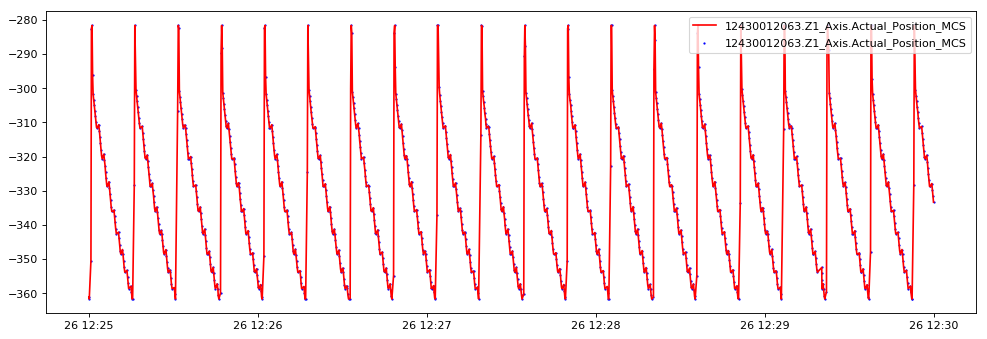

In [116]:
valueID_Z1 = "12430012063.Z1_Axis.Actual_Position_MCS"
startSample = datetime(2019,11,26,12,25)
endSample = datetime(2019,11,26,12,30)
tolerance = 5

dfFindRange = dfAllEbene1.loc[lambda l: (l["ValueID"] == valueID_Z1) & (startSample < l["timeStamp"]) & (l["timeStamp"] < endSample)] # gröbste angabe eines bereichs, nur, um min und max festzulegen
minAllowedValue = dfFindRange.loc[:,"value"].min()-tolerance
maxAllowedValue = dfFindRange.loc[:,"value"].max()+tolerance
print("min: "+str(minAllowedValue)+", max: "+str(maxAllowedValue))

plotActualZ1(dfFindRange)

In [130]:
def approxRange(dfParent,start,end,minValue,maxValue,deltaTime):
    valueID_Z1 = "12430012063.Z1_Axis.Actual_Position_MCS"
    newStart = copy.deepcopy(start)
    newEnd = copy.deepcopy(end)
    tempDF = dfParent.loc[lambda d: (d["ValueID"] == valueID_Z1) & (start < d["timeStamp"]) & (d["timeStamp"] < end)]
    
    #approx. start of frame
    runAtLeastOnce = False
    while minValue < tempDF.loc[:,"value"].min() and tempDF.loc[:,"value"].max() < maxValue:
        newStart = newStart - deltaTime
        tempDF = dfParent.loc[lambda l: (l["ValueID"] == valueID_Z1) & (newStart < l["timeStamp"]) & (l["timeStamp"] < newEnd)]
        runAtLeastOnce = True
    
    if runAtLeastOnce:
        newStart = newStart + deltaTime
    tempDF = dfParent.loc[lambda l: (l["ValueID"] == valueID_Z1) & (newStart < l["timeStamp"]) & (l["timeStamp"] < newEnd)]
    
    #approx. end of frame
    runAtLeastOnce = False
    while minValue < tempDF.loc[:,"value"].min() and tempDF.loc[:,"value"].max() < maxValue:
        newEnd = newEnd + deltaTime
        tempDF = dfParent.loc[lambda l: (l["ValueID"] == valueID_Z1) & (newStart < l["timeStamp"]) & (l["timeStamp"] < newEnd)]
        runAtLeastOnce = True
    
    if runAtLeastOnce:
        newEnd = newEnd - deltaTime
    
    return newStart, newEnd

def approxRangeInSteps(dfParent,initialStart,initialEnd,deltaTimes,sampleTolerance=5):
    start = initialStart
    end = initialEnd
    tempDF = dfParent.loc[lambda d: (d["ValueID"] == valueID_Z1) & (start < d["timeStamp"]) & (d["timeStamp"] < end)]
    minValue = tempDF.loc[:,"value"].min() - sampleTolerance
    maxValue = tempDF.loc[:,"value"].max() + sampleTolerance
    
    for dT in deltaTimes:
        start, end = approxRange(dfAllEbene1,start,end,minValue,maxValue,dT)
    return start,end

Before: 
2019-11-26 12:25:00	-	2019-11-26 12:30:00


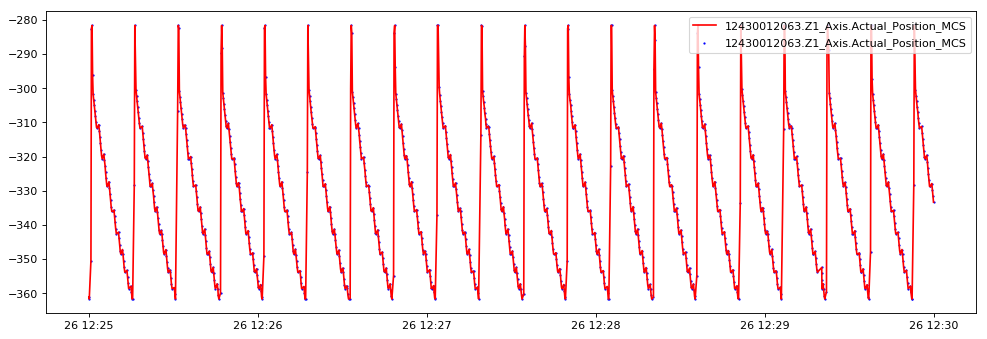

After: 
2019-11-26 12:17:50	-	2019-11-26 12:38:36


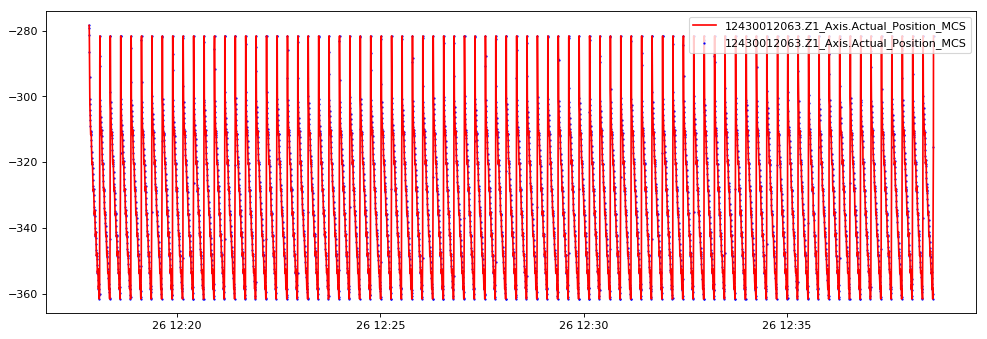

In [131]:
timeDeltas = [timedelta(minutes=5),timedelta(seconds=30),timedelta(seconds=5),timedelta(seconds=1)]
print("Before: ")
print(str(startSample)+"\t-\t"+str(endSample))
dfFindRange = dfAllEbene1.loc[lambda d: (startSample < d["timeStamp"]) & (d["timeStamp"] < endSample)]
plotActualZ1(dfFindRange)

start,end = approxRangeInSteps(dfAllEbene1,startSample,endSample,timeDeltas)
print("After: ")
print(str(start)+"\t-\t"+str(end))
dfFindRange = dfAllEbene1.loc[lambda d: (start < d['timeStamp']) & (d['timeStamp'] < end)]
plotActualZ1(dfFindRange)